In [33]:
import json 
import time
import requests
import urllib, urllib2
from lxml import html
from lxml import etree
import locale
import random
import pymongo
from selenium import webdriver  
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#Connect to mongo
conn = pymongo.MongoClient()
db = conn.faces
collection1 = db.facesMeta

In [35]:
data = pd.DataFrame(list(collection1.find()))

In [4]:
data.columns


Index([       u'_id',  u'attribute',    u'face_id', u'fbPageName',
       u'img_height',  u'img_width',   u'position',       u'svid',
              u'tag',        u'url'],
      dtype='object')

In [36]:
attributes=data[u'attribute'].apply(pd.Series)

In [6]:
attributes.columns

Index([u'age', u'gender', u'pose', u'race', u'smiling'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111407c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10a9f7f50>]], dtype=object)

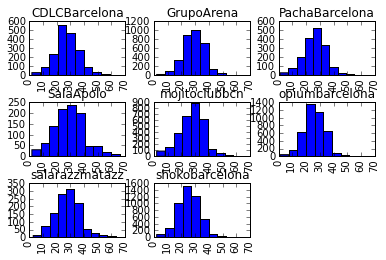

In [72]:
data['age'].hist(by=data['fbPageName'])

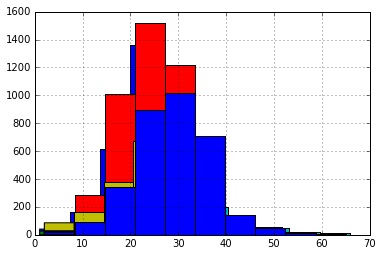

In [78]:
for item in pd.unique(data['fbPageName']):
    data[data.fbPageName==item]['age'].hist()
 

In [37]:
data['gender'] = attributes['gender'].apply(pd.Series)['value']
data['age'] = attributes['age'].apply(pd.Series)['value']
data['race'] = attributes['race'].apply(pd.Series)['value']

fbPageName            
CDLCBarcelona   Female     915
                Male       905
GrupoArena      Male      2250
                Female    1029
PachaBarcelona  Female    1091
                Male       627
SalaApolo       Male       740
                Female     274
mojitoclubbcn   Female    1716
                Male      1277
opiumbarcelona  Female    2755
                Male      1369
salarazzmatazz  Male       710
                Female     453
shokobarcelona  Female    2989
                Male      1815
dtype: int64
fbPageName            
CDLCBarcelona   Female    0.502747
                Male      0.497253
GrupoArena      Male      0.686185
                Female    0.313815
PachaBarcelona  Female    0.635041
                Male      0.364959
SalaApolo       Male      0.729783
                Female    0.270217
mojitoclubbcn   Female    0.573338
                Male      0.426662
opiumbarcelona  Female    0.668041
                Male      0.331959
salarazzmatazz  Male     

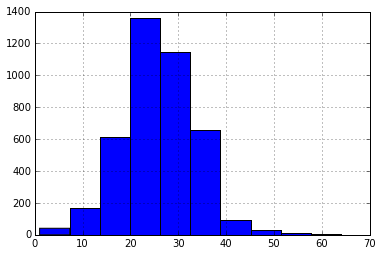

In [42]:
print(data.groupby(data.fbPageName)['gender'].value_counts())
print(data.groupby(data.fbPageName)['gender'].value_counts(normalize=True))
print(data.groupby(data.fbPageName)['race'].value_counts(normalize=True))
print(data[data.fbPageName=='opiumbarcelona']['age'].hist())

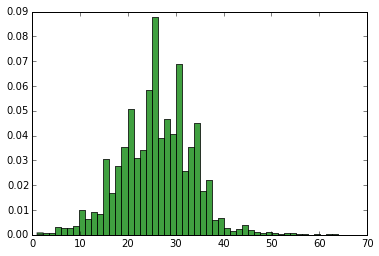

In [71]:
%matplotlib inline
plt.hist(data[data.fbPageName=='opiumbarcelona']['age'], 50, normed=1, facecolor='g', alpha=0.75)
plt.show()

In [55]:
import seaborn

ImportError: cannot import name ellipkm1